In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [3]:
data=pd.read_csv('data.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
selected_features = ['Engine HP','highway MPG','city mpg','Engine Cylinders']
X=data[selected_features]
Y=data['MSRP']

In [ ]:
X.head()

,Engine HP,highway MPG,city mpg,Engine Cylinders
0,335.0,26,19,6.0
1,300.0,28,19,6.0
2,300.0,28,20,6.0
3,230.0,28,18,6.0
4,230.0,28,18,6.0


In [ ]:
Y.head()

0    46135
1    40650
2    36350
3    29450
4    34500
Name: MSRP, dtype: int64

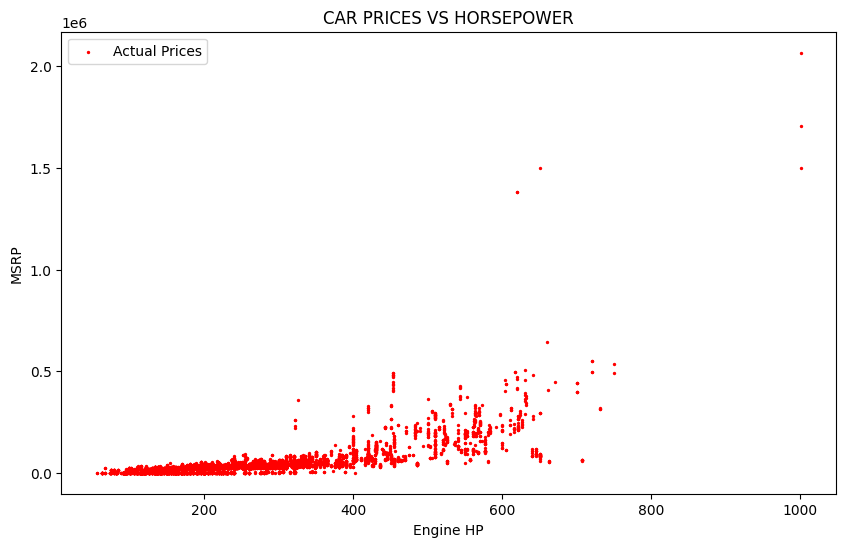

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X['Engine HP'],Y, label='Actual Prices',color='red',s=2)
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.title('CAR PRICES VS HORSEPOWER')
plt.legend()
X=X.fillna(0)
Y=Y.fillna(0)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalernamerandom=MinMaxScaler()
X_train_scaled=scalernamerandom.fit_transform(X_train)
X_test_scaled=scalernamerandom.transform(X_test)

In [ ]:
X_train_scaled

array([[0.26473526, 0.05555556, 0.10852713, 0.25      ],
       [0.44855145, 0.01754386, 0.04651163, 0.5       ],
       [0.17282717, 0.06432749, 0.13178295, 0.25      ],
       ...,
       [0.21978022, 0.06140351, 0.13178295, 0.25      ],
       [0.25974026, 0.04385965, 0.06976744, 0.25      ],
       [0.23476523, 0.04678363, 0.10077519, 0.25      ]])

In [ ]:
X_test_scaled

array([[0.27472527, 0.01754386, 0.03875969, 0.375     ],
       [0.16983017, 0.07602339, 0.13178295, 0.25      ],
       [0.24775225, 0.04678363, 0.08527132, 0.375     ],
       ...,
       [0.14985015, 0.06725146, 0.12403101, 0.25      ],
       [0.16983017, 0.06140351, 0.11627907, 0.3125    ],
       [0.25474525, 0.05555556, 0.12403101, 0.375     ]])

In [ ]:
X_test_scaled[0]

array([0.27472527, 0.01754386, 0.03875969, 0.375     ])

In [ ]:
Y_test[0]

46135

In [ ]:
Y_train

3181     53495
5357     93850
4874     19890
8102      2000
10400    21270
         ...  
11284    27950
5191     24710
5390     27590
860      43270
7270     35880
Name: MSRP, Length: 9531, dtype: int64

In [ ]:
Y_test

3995     29695
7474     30495
7300     37650
3148     16170
747       2000
         ...  
267      35550
4320     48360
5799     31750
6080     20995
11511    57700
Name: MSRP, Length: 2383, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled,Y_train)


KNeighborsRegressor()

In [ ]:
knn_model.score(X_test_scaled,Y_test)

0.8820929448488781

In [ ]:
knn_model.predict([[0.27472527, 0.01754386, 0.03875969, 0.375]])

array([31919.])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train_scaled,Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_model.score(X_test_scaled,Y_test)

0.9310011809774075

In [ ]:
rf_model.predict([[0.27472527, 0.01754386, 0.03875969, 0.375]])

array([32480.87389319])

In [ ]:
def get_user_input():
  print("Please provide the following car features:")
  horsepower = float(input("Horsepower: "))
  city_mpg = float(input("City MPG: "))
  highway_mpg = float(input("Highway MPG: "))
  engine_size = float(input("Engine Size: "))
  return scalernamerandom.transform([[horsepower, city_mpg, highway_mpg, engine_size]])

In [ ]:
  #get user input
  user_input = get_user_input()

  #predict Car Prices using both models
  knn_price = knn_model.predict(user_input)
  rf_price = rf_model.predict(user_input)

  print(f"KNN Predicted Price: ${knn_price[0]:,.2f}")
  print(f"Random Forest Predicted Price: ${rf_price[0]:,.2f}")

Please provide the following car features:
Horsepower: 335
City MPG: 19
Highway MPG: 26
Engine Size: 6
KNN Predicted Price: $56,920.00
Random Forest Predicted Price: $61,717.51


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import r2_score
knn_predictions = knn_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)


NameError: ignored

In [ ]:
knn_r